# Analyse de données

In [1]:
# if running without local install
import sys, os
sys.path.append(os.path.abspath(".."))

import GeoDataKit.geoplot as gp

## Chargement des modules

In [2]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.collections import LineCollection
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Charger les données

In [3]:
# utilisez pandas, fonction pd.read_csv
data = pd.read_csv(r"mesures.csv")
data.head()

,eau,psp,esat,esec,rsat,rsec,vsat,vsec,petro_id
0,15.90,1.71,46940.0,22797.0,70.0,132.0,2603.0,2822.0,1
1,18.60,1.64,10000.0,4759.0,24.0,52.0,1168.0,1466.0,3
2,17.70,1.68,18896.0,14164.0,45.0,96.0,1527.0,2000.0,1
3,14.51,1.65,26812.0,12464.0,49.0,98.0,1705.0,2056.0,1
4,12.27,1.75,28276.0,9264.0,47.0,140.0,2054.0,2585.0,2


In [4]:
petro_desc = pd.read_csv(r"petro_description.csv")
petro_desc

,id,petro,description
0,1,glau,craie glauconieuse (glauconie diffuse)
1,2,blanc,craie blanche
2,3,tglau,craie très glauconieuse (glauconie en feuillet)


In [5]:
# rassemblez les données avec les informations de petrologie
# utilisez la fonction set_index pour définir l'indexe de la table de petro
petro_desc.set_index("id",inplace= True)
# utilisez join pour effectuer une jointure
data = data.join(petro_desc,on="petro_id")
data.head()

,eau,psp,esat,esec,rsat,rsec,vsat,vsec,petro_id,petro,description
0,15.90,1.71,46940.0,22797.0,70.0,132.0,2603.0,2822.0,1,glau,craie glauconieuse (glauconie diffuse)
1,18.60,1.64,10000.0,4759.0,24.0,52.0,1168.0,1466.0,3,tglau,craie très glauconieuse (glauconie en feuillet)
2,17.70,1.68,18896.0,14164.0,45.0,96.0,1527.0,2000.0,1,glau,craie glauconieuse (glauconie diffuse)
3,14.51,1.65,26812.0,12464.0,49.0,98.0,1705.0,2056.0,1,glau,craie glauconieuse (glauconie diffuse)
4,12.27,1.75,28276.0,9264.0,47.0,140.0,2054.0,2585.0,2,blanc,craie blanche


In [6]:
# récupérez la liste des variables à partir du fichier
mesure_desc = pd.read_csv(r"mesures_description.csv")
mesure_desc

,name,decription,unit
0,eau,teneur en eau,%
1,psp,poids spécifique,g.cm-3
2,esat,module d’élasticité à l’état saturé d’eau,MPa
3,esec,module d’élasticité à l’état sec,MPa
4,rsat,résistance à la compression à l’état saturé d’eau,MPa
5,rsec,résistance à la compression à l’état sec,MPa
6,vsat,vitesse du son à l’état saturé d’eau,m.s-1
7,vsec,vitesse du son à l’état sec,m.s-1


In [7]:
mesure_name = mesure_desc["name"]
print(mesure_name)

0     eau
1     psp
2    esat
3    esec
4    rsat
5    rsec
6    vsat
7    vsec
Name: name, dtype: object


# Analyse des données

In [8]:
# statistiques de base avec describe
data[mesure_name].describe()

,eau,psp,esat,esec,rsat,rsec,vsat,vsec
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,19.122857,1.664762,28898.142857,17724.476190,44.809524,96.190476,2124.380952,2374.047619
std,3.012061,0.049761,13834.281992,7027.503594,10.390472,35.350557,430.148867,333.807651
min,12.270000,1.560000,7810.000000,4759.000000,24.000000,52.000000,1168.000000,1466.000000
25%,17.310000,1.640000,19982.000000,12464.000000,40.000000,64.000000,1995.000000,2240.000000
50%,20.230000,1.660000,25000.000000,19400.000000,44.000000,93.000000,2315.000000,2516.000000
75%,21.690000,1.690000,42900.000000,22800.000000,49.000000,127.000000,2395.000000,2585.000000
max,22.150000,1.750000,52600.000000,31400.000000,70.000000,155.000000,2603.000000,2822.000000


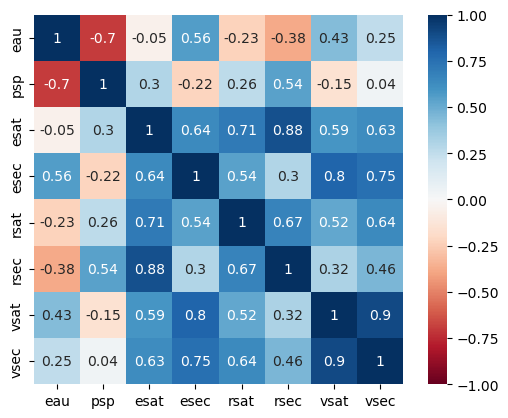

In [9]:
gp.correlation_matrix(data[mesure_name], cmap="RdBu")

### PCA

In [18]:
class_name = "petro"

data_not_na = data[list(mesure_name)+[class_name]].dropna()
data_values = data_not_na[mesure_name]
data_class = data[class_name]

scaler = StandardScaler().fit(data_values)
normalised_data = scaler.transform(data_values)
pca = PCA()
pca = pca.fit(normalised_data)

pc_names = gp.pc_names(pca)
data_values[pc_names] = pca.transform(normalised_data)
data_values[class_name] = data_class

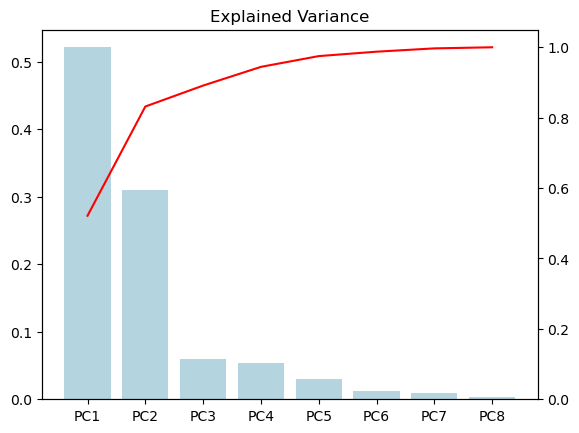

In [19]:
gp.plot_explained_variance(pca)

In [20]:
print("\n".join(["{}: {:5.2f}%".format(name_i, cp_i) for name_i, cp_i in zip(pc_names,pca.explained_variance_ratio_.round(4) * 100)]))

PC1: 52.14%
PC2: 31.03%
PC3:  5.95%
PC4:  5.31%
PC5:  3.06%
PC6:  1.25%
PC7:  0.94%
PC8:  0.31%


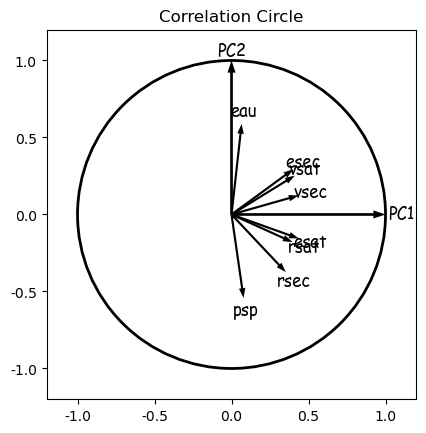

In [21]:
gp.plot_correlation_circle(pca, mesure_name)

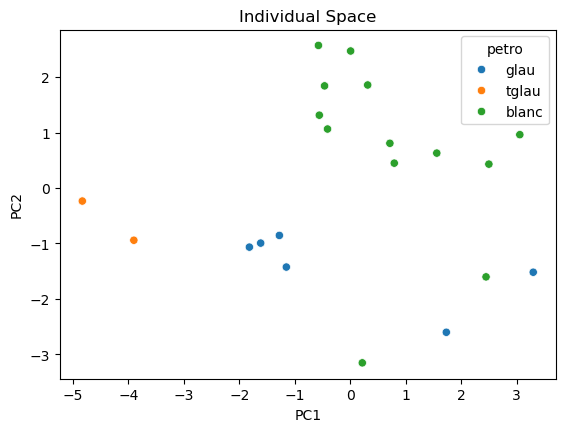

In [22]:
gp.plot_principal_components(pca, data_values, s=10, hue="petro")

## Linear Discriminant Analysis

In [23]:

class_name = "petro"

data_not_na = data[list(mesure_name)+[class_name]].dropna()
data_values = data_not_na[mesure_name]
data_class = data[class_name]

scaler = StandardScaler().fit(data_values)
normalised_data = scaler.transform(data_values)
lda = LinearDiscriminantAnalysis()
lda.fit(normalised_data, data_class)

pc_names = gp.pc_names(lda)
data_values[pc_names] = lda.transform(normalised_data)
data_values[class_name] = data_class

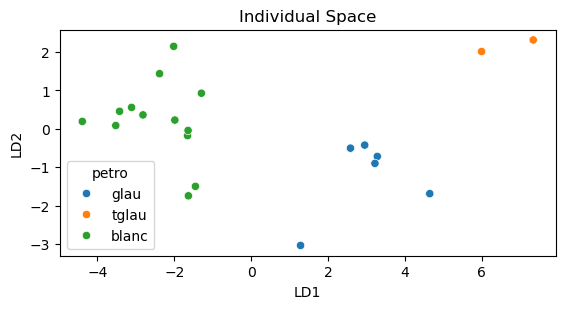

In [24]:
gp.plot_principal_components(lda, data_values, s=10, hue="petro")

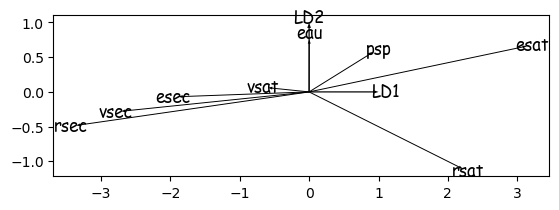

In [25]:
gp.plot_correlation_circle(lda, mesure_name)